In [3]:
%matplotlib inline
import numpy as np
from scipy.io import loadmat
import mne, glob
import os
import matplotlib.pyplot as plt


In [4]:
current_directory = os.getcwd()
dataset = os.path.join(current_directory, "Dataset")
current_directory

'/Users/diegozanutti/Università/HDA/EEG Motor Imagery Project'

In [5]:
file_path = os.path.join(dataset, "1Description.txt")  # Replace with the actual path to your .txt file

try:
    with open(file_path, 'r') as file:
        content = file.read()
        print(content)
except FileNotFoundError:
    print(f"File not found: {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

Subjects
SUBJECTX....A-Z

5F= FIVE FINGERS
CLA=CLASSIC
FREEFORM=FREE STYLE 5F
HaLT=HAND LEG TONGUE
NoMT=NO MOTOR

L= Left
R= Right
F= Finger
H= High
SGL= Single
Freq= Frequency
Tong= Tongue
St=State
Inter=Interactive Interface

Date: 
2016 APRIL 08= 160508(YYMMDD)

Subject's information:
SUBJECTA - Male, 20-25 y.o.
SUBJECTB - Male, 20-25 y.o.
SUBJECTC - Male, 25-30 y.o.
SUBJECTD - Male, 25-30 y.o.
SUBJECTE - Female, 20-25 y.o.
SUBJECTF - Male, 30-35 y.o.
SUBJECTG - Male, 30-35 y.o.
SUBJECTH - Male, 20-25 y.o.
SUBJECTI - Female, 20-25 y.o.
SUBJECTJ - Female, 20-25 y.o.
SUBJECTK - Male, 20-25 y.o.
SUBJECTL - Female, 20-25 y.o.
SUBJECTM - Female, 20-25 y.o.

Electrode order (1-22):
Fp1 Fp2 F3 F4 C3 C4 P3 P4 O1 O2 A1 A2 F7 F8 T3 T4 T5 T6 Fz Cz Pz X3

Marker codes:
CLA, HaLT, FreeForm interaction paradigm
1-left hand MI, 2-right hand MI, 3-passive state, 4-left leg MI, 5-tongue MI, 6-right  leg MI

5F interaction paradigm
1-thumb MI, 2-index finger MI, 3-middle finger MI, 4-ring finger MI, 

In [6]:
matfiles = glob.glob(os.path.join(dataset, "*.mat"))
CLAfiles = glob.glob(os.path.join(dataset, "*CLA*.mat"))
fiveFfiles = glob.glob(os.path.join(dataset, "*5F*.mat"))
HaLTfiles = glob.glob(os.path.join(dataset, "*HaLT*.mat"))
FFfiles = glob.glob(os.path.join(dataset, "*FREEFORM*.mat"))
NoMTfiles = glob.glob(os.path.join(dataset, "*NoMT*.mat"))
data = {}
CLAfiles

['/Users/diegozanutti/Università/HDA/EEG Motor Imagery Project/Dataset/CLASubjectD1511253StLRHand.mat',
 '/Users/diegozanutti/Università/HDA/EEG Motor Imagery Project/Dataset/CLASubjectB1512153StLRHand.mat',
 '/Users/diegozanutti/Università/HDA/EEG Motor Imagery Project/Dataset/CLASubjectE1601193StLRHand.mat',
 '/Users/diegozanutti/Università/HDA/EEG Motor Imagery Project/Dataset/CLA-SubjectJ-170504-3St-LRHand-Inter.mat',
 '/Users/diegozanutti/Università/HDA/EEG Motor Imagery Project/Dataset/CLASubjectC1512163StLRHand.mat',
 '/Users/diegozanutti/Università/HDA/EEG Motor Imagery Project/Dataset/CLASubjectB1510193StLRHand.mat',
 '/Users/diegozanutti/Università/HDA/EEG Motor Imagery Project/Dataset/CLASubjectC1511263StLRHand.mat',
 '/Users/diegozanutti/Università/HDA/EEG Motor Imagery Project/Dataset/CLASubjectE1601223StLRHand.mat',
 '/Users/diegozanutti/Università/HDA/EEG Motor Imagery Project/Dataset/CLASubjectA1601083StLRHand.mat',
 '/Users/diegozanutti/Università/HDA/EEG Mot

In [57]:
dat = loadmat(CLAfiles[2])
X = dat['o']['data'][0,0]
Y = dat['o']['marker'][0,0]
X.shape

(664400, 22)

In [58]:
Y.shape

(664400, 1)

In [59]:
def count_sequences(array):
    # Initialize variables
    sequence_counts = []
    current_count = 1
    cum_counts = [0]
    # Iterate through the array
    for i in range(1, len(array)):
        # Check if the current element is equal to the previous one
        if array[i] == array[i - 1]:
            current_count += 1
        else:
            # If not equal, record the count and reset it
            cum_counts.append(current_count+cum_counts[-1])
            sequence_counts.append(current_count)
            current_count = 1
    
    # Record the count of the last sequence
    sequence_counts.append(current_count)
    
    return sequence_counts,cum_counts

# Example usage
counts, cum = count_sequences(Y)

In [60]:
len(cum)

1933

Original X shape: (664400, 22)
Original Y shape: (664400, 1)
Reshaped X shape: (958, 22, 200)
Reshaped Y shape: (958, 1, 200)


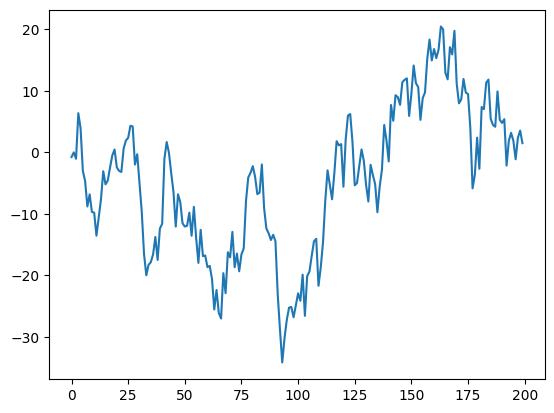

In [103]:
import numpy as np

trial_length = 200


# Initialize arrays to store reshaped data
reshaped_X = []
reshaped_Y = []

# Reshape each trial
for idx in range(1,len(cum),2):
    
    start_idx = cum[idx]  # Ensure start index is within bounds
    end_idx = start_idx + trial_length
    if Y[start_idx]<1:
        print("Error occurred retrieving trial indexes")
    if Y[start_idx]<10:
        # Reshape X and update Y accordingly
        reshaped_X.append(X[start_idx:end_idx, :])  # Transpose to get channels x time
        reshaped_Y.append(Y[start_idx:end_idx])
# Example usage
# Assuming X and Y are your original data arrays

# Reshape the data
re_X = np.transpose(np.array(reshaped_X),(0,2,1))
re_Y = np.transpose(np.array(reshaped_Y),(0,2,1))

print("Original X shape:", X.shape)
print("Original Y shape:", Y.shape)
print("Reshaped X shape:", re_X.shape)
print("Reshaped Y shape:", re_Y.shape)
plt.plot(re_X[9,10,:])
plt.show()

In [177]:
chan_names = ["Fp1", "Fp2", "F3", "F4", "C3", "C4", "P3", "P4", "O1", "O2", "A1", "A2", "F7", "F8", "T3", "T4", "T5", "T6", "Fz", "Cz" ,"Pz"] #There is also X3
CLA_event_id = dict(left_hand = 1, right_hand = 2, passive = 3)
sfreq = 200

In [137]:
#print(np.where(re_Y[0,:]<10))
data = re_X
classes = np.unique(re_Y)
n_channels = len(data[1,:,1])-1
info = mne.create_info(
        ch_names = chan_names,
        ch_types = ['eeg']*n_channels,
        sfreq    = sfreq 
        )   

info.set_montage('standard_1020')
print('Event created :', info)    

Event created : <Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, A1, A2, F7, F8, T3, ...
 chs: 21 EEG
 custom_ref_applied: False
 dig: 24 items (3 Cardinal, 21 EEG)
 highpass: 0.0 Hz
 lowpass: 100.0 Hz
 meas_date: unspecified
 nchan: 21
 projs: []
 sfreq: 200.0 Hz
>


In [167]:
eventLength = re_Y.shape[0]
ev = [i*sfreq for i in range(eventLength)]
labels = re_Y[:,0,0]

In [168]:
# Create an event matrix: events with alternating event codes
events = np.column_stack((np.array(ev),
                          np.zeros(eventLength,  dtype = int),
                          np.array(labels)))
events


In [175]:
data[:,0:21,:].shape

(958, 21, 200)

In [178]:
tmin = 0                
        # Create the :class:`mne.EpochsArray` object
epochs = mne.EpochsArray(data[:,0:21,:], info, events, tmin, CLA_event_id)

Not setting metadata
958 matching events found
No baseline correction applied
0 projection items activated


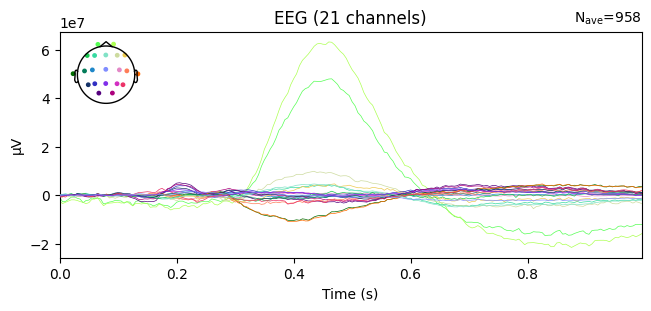

In [179]:

# quick visualization 
epochs.average().plot();

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


/Users/diegozanutti/miniforge3/lib/python3.10/site-packages/mne/viz/utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


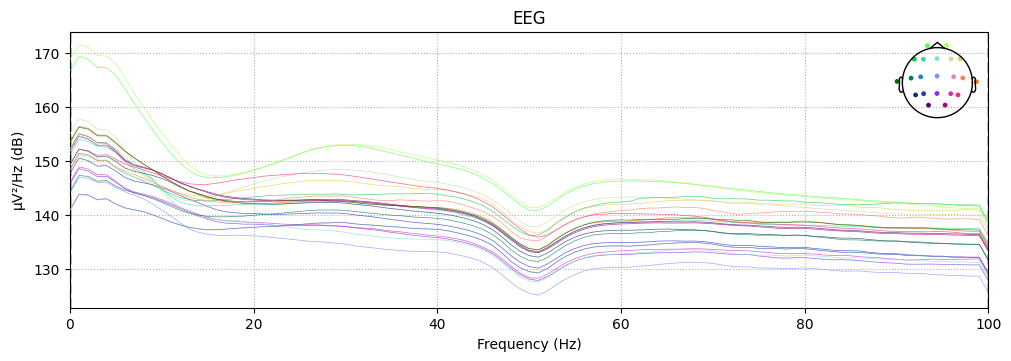

In [181]:
epochs.compute_psd().plot();

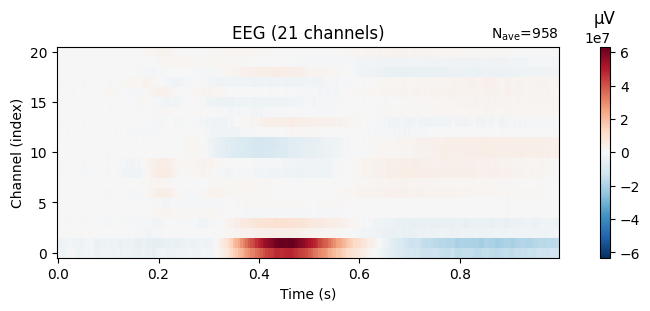

In [182]:
epochs.average().plot_image();

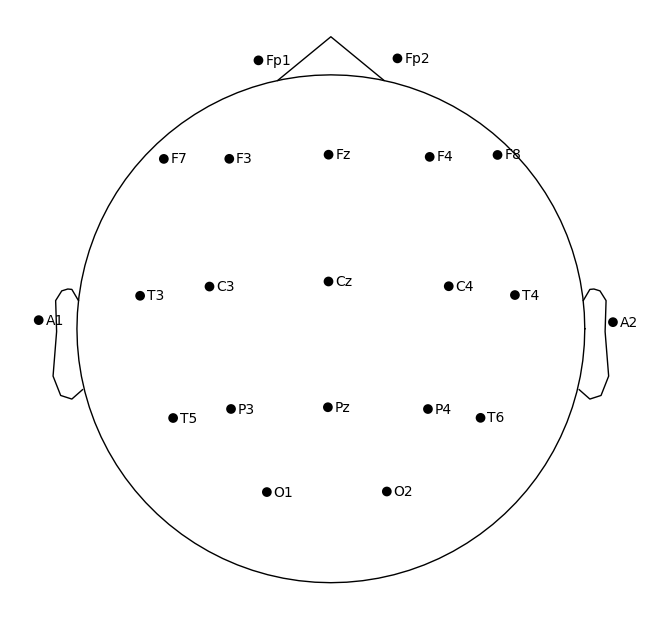

In [183]:
epochs.plot_sensors(show_names=True);

In [184]:
epochs

Number of events,958
Events,left_hand: 320passive: 324right_hand: 314
Time range,0.000 – 0.995 s
Baseline,off


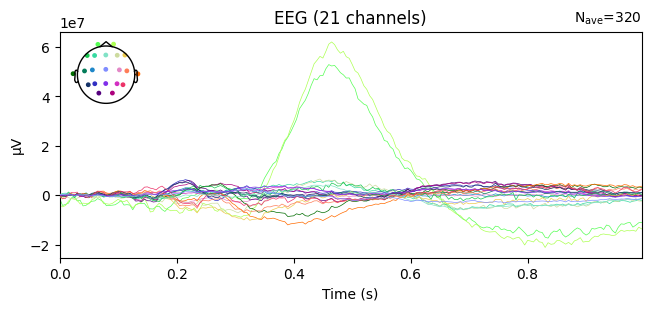

In [187]:
epochs['left_hand'].average().plot();

In [160]:
# Assuming reshaped_X and reshaped_Y are your reshaped data arrays

# Choose a trial to plot (for example, the first trial)
trial_index = 1

# Extract data for the chosen trial
trial_data = reshaped_X[:,2,:]
trial_label = reshaped_Y[1]
  

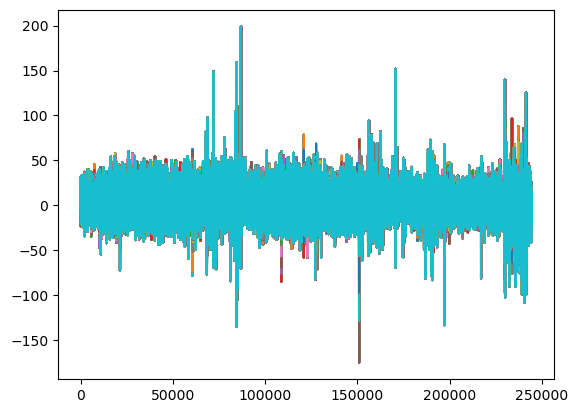

In [161]:
# Plot the trial
plt.plot(trial_data)
plt.show()